## Can a CNN discover an auto-steregram?

In this first experiment is shown wherever a simple sequential CNN will be able to classify the optimal disparity of an autostereogram. 

Here, a simple CNN is define as a CNN composed a few stacked layers with two different stage:  convolution (convolution and polling layers) stage followed by a clasification stage (full connected layers).

In [1]:
import sys
sys.path.append("../src")

import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

from models import classify_overlap
from livelossplot import PlotLossesKerasTF
from utils import show_sampledata
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
model, train_gen, val_gen = classify_overlap()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 98, 198)       320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 94, 194)       25632     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 88, 188)       50208     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 44, 188)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 42, 186)       4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 38, 182)       25632     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 176)       5

The following figure show a sample of the training data and the effect of find the correct disparity.

The input image are the auto-stereogram images (left column). When the correct disparity factor is obtained (target of the model) the hidden figure can be shown (center column). If other disparity is used to try to show the hidden figure only noise is seen.

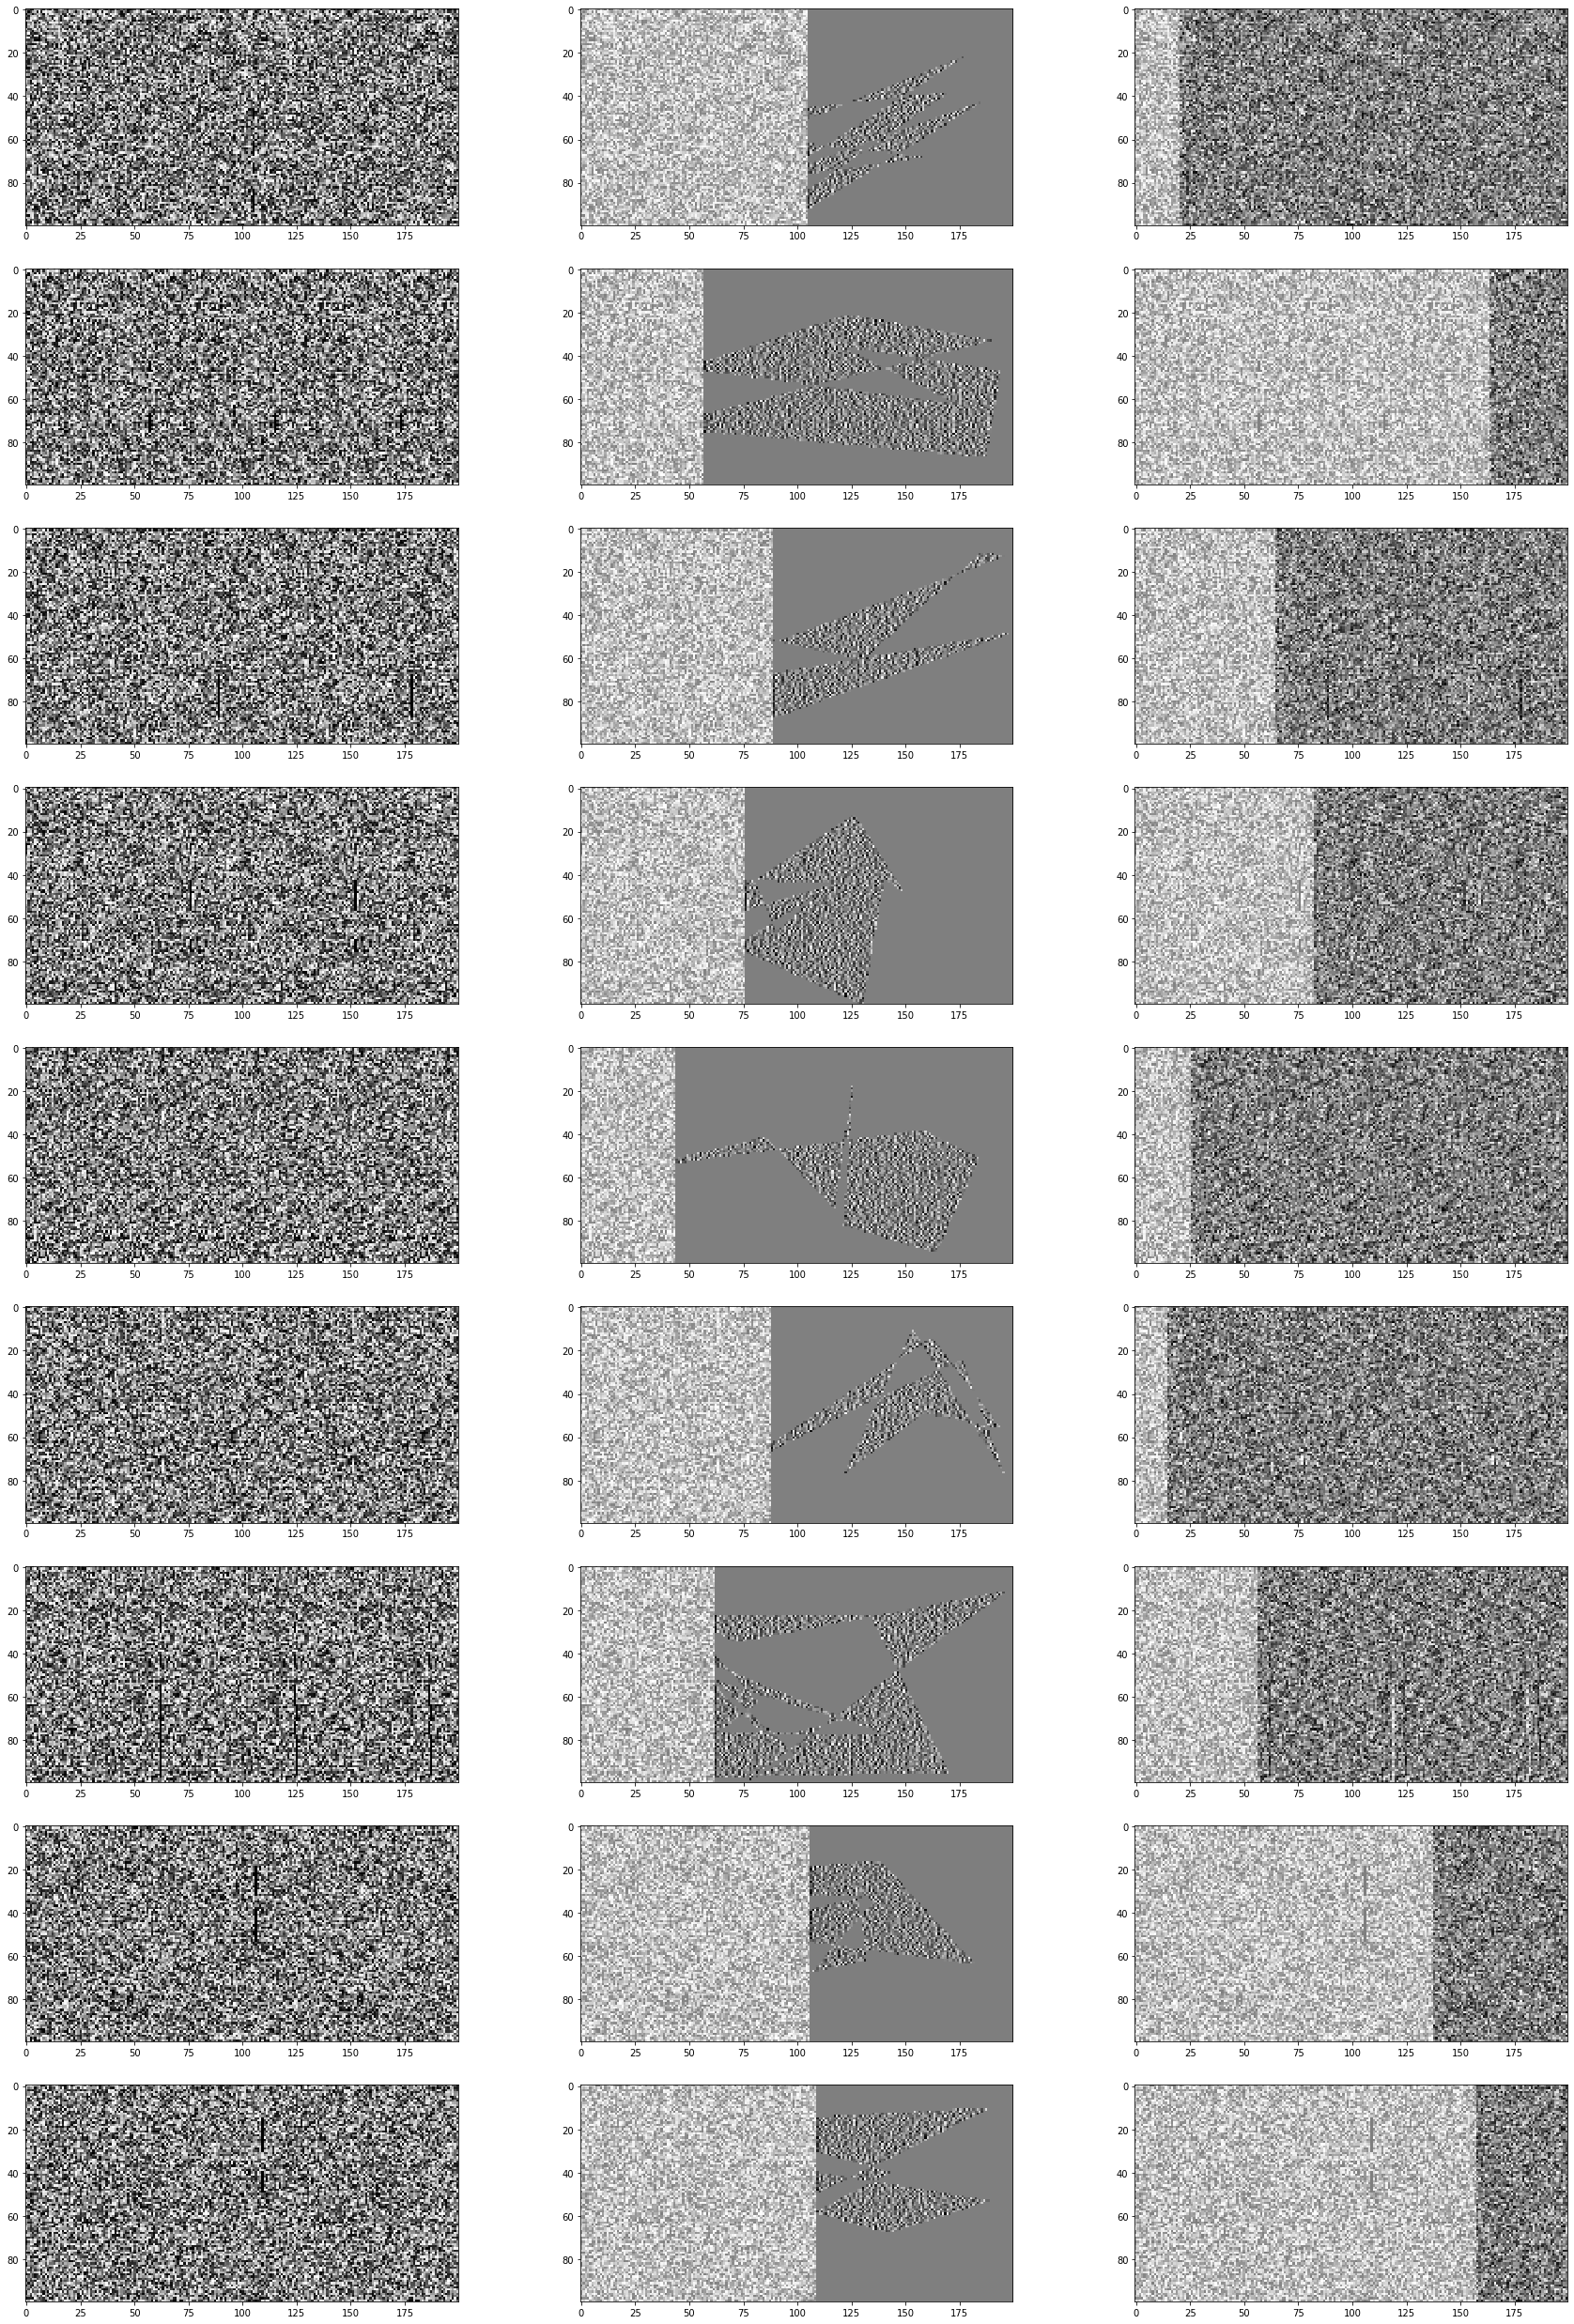

In [6]:
show_sampledata(train_gen)
plt.show()

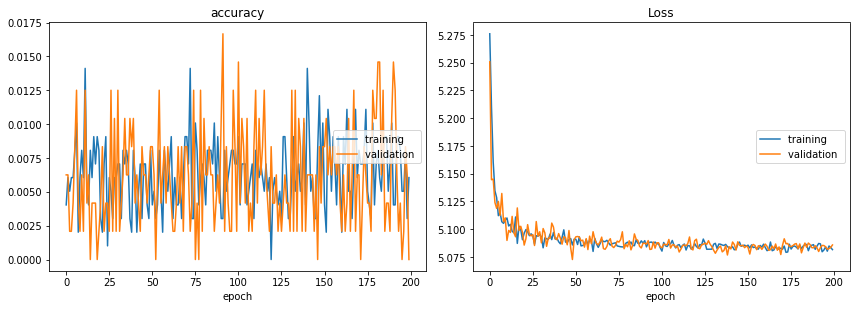

accuracy
	training         	 (min:    0.000, max:    0.014, cur:    0.006)
	validation       	 (min:    0.000, max:    0.017, cur:    0.000)
Loss
	training         	 (min:    5.079, max:    5.276, cur:    5.082)
	validation       	 (min:    5.073, max:    5.251, cur:    5.086)
31/31 [==============================] - 40s 1s/step - loss: 5.0815 - accuracy: 0.0060 - val_loss: 5.0857 - val_accuracy: 0.0000e+00


In [3]:
model.fit_generator(generator=train_gen, validation_data=val_gen,
                    epochs=200, verbose=1, callbacks=[PlotLossesKerasTF()])

**After train the model we can see that a simple CNN are not be able to find the correct disparity factor that allow to show the hidden figure.**

Note that model have learnt almost nothing after 200 epochs.